<a href="https://colab.research.google.com/github/DanialQureshi26/ML-Projects/blob/main/tensorflow_mnist_fashion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# import the tensorflow fashion mnist dataset

import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(train_data, train_labels) ,  (test_data, test_labels) = mnist.load_data()



In [38]:
# Normalize pixel values to be between 0 and 1
train_data = train_data / 255.0
test_data = test_data / 255.0

In [39]:
# Lets see an example data and its label from the dataset

print("Example data:", train_data[0])
print("Example label:", train_labels[0])


Example data: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.0

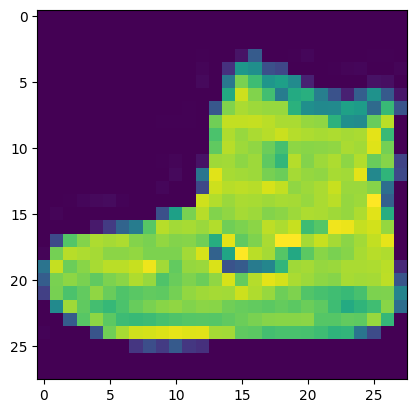

In [40]:
# lets plot that using the matplotlib

import matplotlib.pyplot as plt

plt.imshow(train_data[0])
plt.show()


In [41]:
# create list of all our traning labels so that it can be human understandable

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


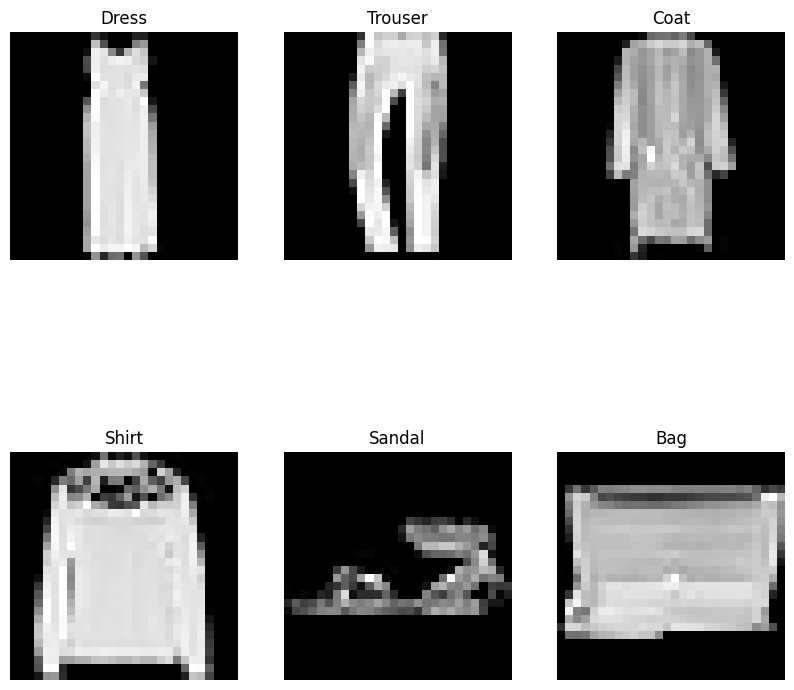

In [42]:
# Plot 6 random images from training horizontally

import random
import matplotlib.pyplot as plt

# Choose 6 random images from the training set
random_indices = random.sample(range(len(train_data)), 6)

# Initialize the figure
plt.figure(figsize=(10, 10))

# Loop over the 6 images and plot them
for i, index in enumerate(random_indices):
  plt.subplot(2, 3, i + 1)
  plt.imshow(train_data[index], cmap="gray")
  plt.title(class_names[train_labels[index]])
  plt.axis("off")

# Display the figure
plt.show()


In [43]:
# find the input shape of any image from training

print(train_data[0].shape)


(28, 28)


# Start Building Our Model

In [44]:
# Set random seed
tf.random.set_seed(42)

In [45]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # Flatten the data into one long vector from 28 * 28 to 784
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

In [47]:
# prompt: Compile the model

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # SparseCategoricalCrossentropy is used instead of simple one because our data is not OneHotEncoded it is in int form
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])


In [48]:
# prompt: Fit the model

model_1.fit(train_data, train_labels, epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4962 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3726 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3347 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3095 - accuracy: 0.8873
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2926 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2784 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2689 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2567 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2468 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.23

In [51]:
test_loss, test_acc = model_1.evaluate(test_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3439 - accuracy: 0.8798 - 670ms/epoch - 2ms/step

Test accuracy: 0.879800021648407
